Spatial Clustering of incidents for west-midlands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from pyproj import Proj, transform
from sklearn.cluster import DBSCAN

from folium.plugins import HeatMap
import seaborn as sns

In [2]:
incident_data = pd.read_csv('data/processed/incident_wmids_14_22.csv')

In [5]:
incident_data.head()

,call_time,incident_classification_label,incident_profile_label,incident_classification_level1,prl_count,brv_count,EASTINGS,NORTHINGS,call_seconds,reaction_seconds,driving_seconds,call_hour,call_day,call_month,call_year,index_right
0,2014-08-05 00:51:11,Other type of accidental fire,High Risk,FIRE,1,0,429008.867960,279466.431647,78,81,267.0,0,1,8,2014,0
1,2014-08-05 01:53:23,False Alarms (Equipment),Low Risk,FALSE_ALARM,0,1,400060.417513,291291.512584,57,104,175.0,1,1,8,2014,0
2,2014-08-05 02:04:43,Gas leak,High Risk,SSC,2,0,397304.803476,289145.924308,102,149,311.0,2,1,8,2014,0
3,2014-08-05 02:09:56,False alarm raised with good intent,False Alarms,FALSE_ALARM,0,1,404480.191871,289576.642513,70,85,393.0,2,1,8,2014,0
4,2014-08-05 02:59:36,Deliberate Rubbish Fires,Secondary Fires that attract a 20 minute-respo...,FIRE,0,1,433324.298276,282473.140722,54,278,156.0,2,1,8,2014,0


In [4]:
# show all the unique values in the 'incident_type' column:
incident_data['incident_profile_label'].unique()

array(['High Risk', 'Low Risk', 'False Alarms',
       'Secondary Fires that attract a 20 minute-response time',
       'Medium Risk'], dtype=object)

Slice the dataset into 4:
1. High Risk Incidents
2. Medium Risk Incidents
3. Low Risk Incidents
4. False Alarm

In [8]:
# slice the data into 4 sub datasets, by incident_profile_label = "High Risk	", "Low Risk", "Medium Risk", "Very High Risk" ""
# select a high risk:
high_risk = incident_data[incident_data['incident_profile_label'] == 'High Risk']
low_risk = incident_data[incident_data['incident_profile_label'] == 'Low Risk']
medium_risk = incident_data[incident_data['incident_profile_label'] == 'Medium Risk']
false_alarm = incident_data[incident_data['incident_profile_label'] == 'False Alarms']

In [23]:
def dbscan_clutstering(df, eps, min_samples, plot_title):
    coords = df[['EASTINGS', 'NORTHINGS']].values
    # Perform DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(coords)

    # Add the cluster labels to the DataFrame
    df['cluster'] = db.labels_

    # Plot the clustered data
    plt.figure(figsize=(10, 6))

    # Scatter plot of the points
    plt.scatter(df['EASTINGS'], df['NORTHINGS'], c=df['cluster'], cmap='viridis', marker='o')
    # add color bar legend
    plt.colorbar()

    # Add labels and title
    plt.xlabel('EASTINGS')
    plt.ylabel('NORTHINGS')

    plt.title(plot_title)

    plt.show()

/tmp/ipykernel_2703/3819275729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = db.labels_


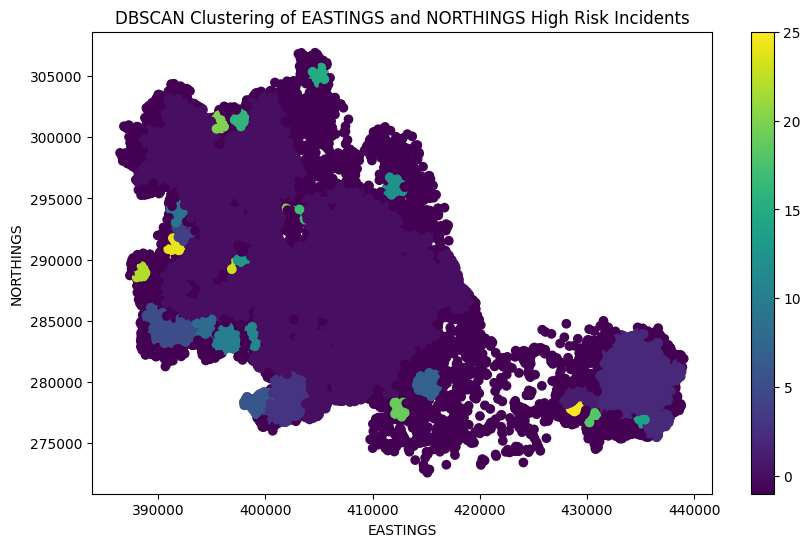

In [24]:
dbscan_clutstering(high_risk, 500, 50, 'DBSCAN Clustering of EASTINGS and NORTHINGS High Risk Incidents')

/tmp/ipykernel_2703/3819275729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = db.labels_


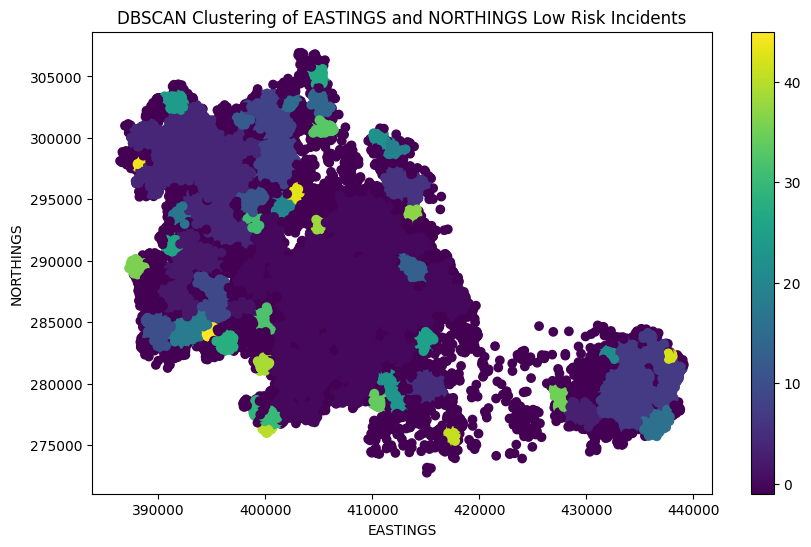

In [32]:
dbscan_clutstering(low_risk, 500, 50, 'DBSCAN Clustering of EASTINGS and NORTHINGS Low Risk Incidents')

/tmp/ipykernel_2703/3819275729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = db.labels_


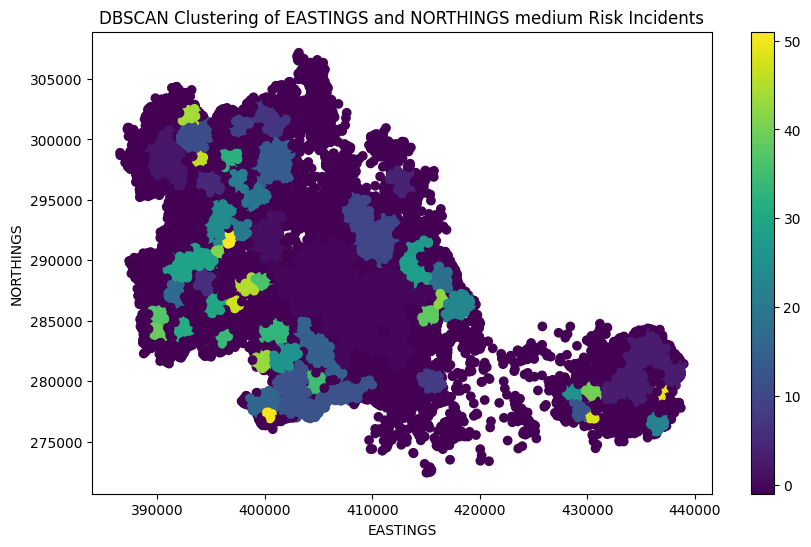

In [31]:
dbscan_clutstering(medium_risk, 500, 50, 'DBSCAN Clustering of EASTINGS and NORTHINGS medium Risk Incidents')

/tmp/ipykernel_2703/3819275729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = db.labels_


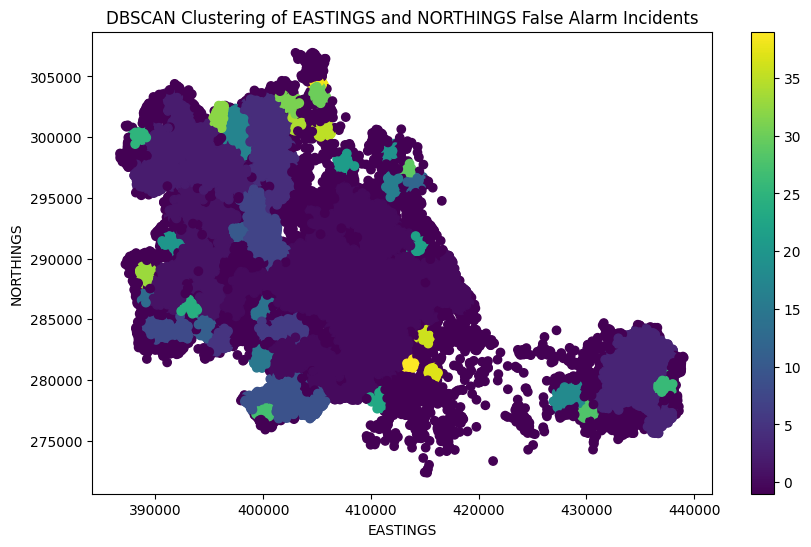

In [30]:
dbscan_clutstering(false_alarm, 500, 50, 'DBSCAN Clustering of EASTINGS and NORTHINGS False Alarm Incidents')

In [12]:
# perform spatial clustering
def spatial_clustering(data, eps, min_samples):
    # convert the lat and lon to UTM
    
    data['x'], data['y'] = transform(Proj(init='epsg:4326'), Proj(init='epsg:32630'), data['longitude'].values, data['latitude'].values)
    # convert the x and y to numpy array
    coords = data[['x', 'y']].values
    # perform clustering
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(coords)
    data['cluster'] = db.labels_
    return data

In [ ]:
# transform the dataset into geopandas dataframe
from geopandas import GeoDataFrame
from shapely.geometry import Point

# create a geometry column
#high_risk['geometry'] = high_risk.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
#low_risk['geometry'] = low_risk.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
#medium_risk['geometry'] = medium_risk.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
#false_alarm['geometry'] = false_alarm.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)




In [12]:
# Define the coordinate systems
bng = Proj('epsg:27700')  # British National Grid
wgs84 = Proj('epsg:4326')  # WGS84 (latitude/longitude)

# Convert coordinates
def convert_coords(row):
    lon, lat = transform(bng, wgs84, row['NORTHINGS'],row['EASTINGS'])
    return pd.Series({'longitude': lon, 'latitude': lat})

incident_data[['longitude', 'latitude']] = incident_data.apply(convert_coords, axis=1)

C:\Users\Derek Ding\AppData\Local\Temp\ipykernel_2588\2682231518.py:7: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(bng, wgs84, row['NORTHINGS'],row['EASTINGS'])


In [17]:
incident_data.head()

,call_time,incident_classification_label,incident_profile_label,incident_classification_level1,prl_count,brv_count,EASTINGS,NORTHINGS,call_seconds,reaction_seconds,driving_seconds,call_hour,call_day,call_month,call_year,index_right,longitude,latitude,cluster
0,2014-08-05 00:51:11,Other type of accidental fire,High Risk,FIRE,1,0,429008.867960,279466.431647,78,81,267.0,0,1,8,2014,0,53.743478,-3.829117,0
1,2014-08-05 01:53:23,False Alarms (Equipment),Low Risk,FALSE_ALARM,0,1,400060.417513,291291.512584,57,104,175.0,1,1,8,2014,0,53.485992,-3.639787,0
2,2014-08-05 02:04:43,Gas leak,High Risk,SSC,2,0,397304.803476,289145.924308,102,149,311.0,2,1,8,2014,0,53.460786,-3.671134,0
3,2014-08-05 02:09:56,False alarm raised with good intent,False Alarms,FALSE_ALARM,0,1,404480.191871,289576.642513,70,85,393.0,2,1,8,2014,0,53.525345,-3.667177,0
4,2014-08-05 02:59:36,Deliberate Rubbish Fires,Secondary Fires that attract a 20 minute-respo...,FIRE,0,1,433324.298276,282473.140722,54,278,156.0,2,1,8,2014,0,53.782933,-3.785195,0


In [16]:
import pandas as pd

# save the lat long processed data to a csv
incident_data.to_csv('data/processed/incident_14_22_coord_4326_.csv', index=False)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Derek Ding\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Derek Ding\AppData\Local\Temp\ipykernel_2588\3630404379.py", line 4, in <cell line: 4>
    incident_data.to_csv('data/processed/incident_14_22_coord_4326_.csv', index=False)
  File "c:\Users\Derek Ding\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 3466, in to_csv
    .. versionchanged:: 2.0.0
  File "c:\Users\Derek Ding\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\format.py", line 1078, in to_csv
  File "c:\Users\Derek Ding\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\csvs.py", line 24, in <module>
    from pandas._typing import SequenceNotStr
ImportError: cannot import name 'SequenceNotStr' from 'pandas._typing' (c:\Users\Derek Ding\AppD

Spatial Cluter for High Risk:

Spatial Cluster for Medium Risk:

Spatial Cluster for Low Risk

Spatial Cluster for False Alarm

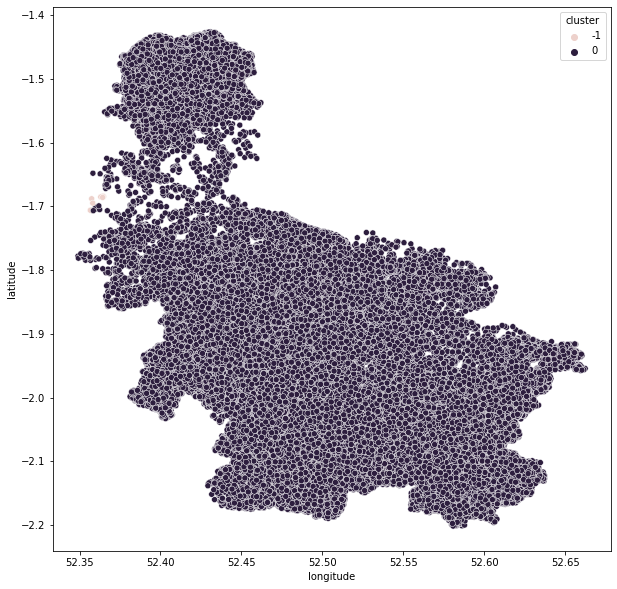

In [8]:
# visualise the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=incident_data)
plt.show()


Show heatmap in interactive mode:

In [ ]:
# Create a base map
m = folium.Map(location=[incident_data['latitude'].mean(), incident_data['longitude'].mean()], zoom_start=12)

# Prepare heatmap data
heat_data = [[row['latitude'], row['longitude']] for index, row in incident_data.iterrows()]

# Add heatmap to the map
HeatMap(heat_data).add_to(m)

# Add clustered data with color depth
unique_clusters = incident_data['cluster'].unique()
cluster_colors = sns.color_palette("hsv", len(unique_clusters)).as_hex()

for cluster in unique_clusters:
    cluster_data = incident_data[incident_data['cluster'] == cluster]
    for index, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            radius=5,
            color=cluster_colors[cluster],
            fill=True,
            fill_color=cluster_colors[cluster],
            fill_opacity=0.7
        ).add_to(m)

# Save the map to an HTML file
m.save("clustered_heatmap.html")

In [5]:
# perform spatial clustering on type of incidents on the dataframe: incident_data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# select the columns to be used for clustering

# incident_data = incident_data[['Latitude', 'Longitude', 'Incident Type']]
incident_data = incident_data[['Latitude', 'Longitude', 'Incident Type']]
incident_data = incident_data.dropna()

# standardize the data
scaler = StandardScaler()
incident_data_scaled = scaler.fit_transform(incident_data)

# perform clustering
kmeans = KMeans(n_clusters=5, random_state=0)
incident_data['Cluster'] = kmeans.fit_predict(incident_data_scaled)

# plot the clusters
plt.scatter(incident_data['Latitude'], incident_data['Longitude'], c=incident_data['Cluster'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering of Incidents')
plt.show()

KeyError: "None of [Index(['Latitude', 'Longitude', 'Incident Type'], dtype='object')] are in the [columns]"